In [1]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [2]:
wd <- file.path(analysis_dir, "validation", "03_WGBS", "03.5_RRBS_test_in_WGBS")

setwd(wd)

In [4]:
summary_files = list.files(pattern = "auc_test", recursive = TRUE)

In [5]:
length(summary_files)

[1] 577

In [6]:
summary_auc_list <- sapply(summary_files, fread, simplify = F)

In [7]:
summary_auc <- rbindlist(summary_auc_list)

In [8]:
head(summary_auc)

type,auc,ifRand,AUC_train,species_train
<chr>,<dbl>,<chr>,<dbl>,<chr>
Mus_musculus,0.6131550,noRandTest,0.700509,AB
Gallus_gallus,0.7407010,noRandTest,0.700509,AB
Phascolarctos_cinereus,0.7396960,noRandTest,0.700509,AB
Bos_taurus,0.6271619,noRandTest,0.700509,AB
Danio_rerio_GSE134055,0.5294790,noRandTest,0.700509,AB
Branchiostoma_lanceolatum,0.4509150,noRandTest,0.700509,AB


In [9]:
setdiff(sp_df$species, unique(summary_auc$species_train))

[1] "ISS" "AW"  "SRP"

In [10]:
sp_list <- fread("~/projects/DNAmeth500species/meta/species_list.txt", header = F)$V1

In [11]:
summary_auc[type == "Danio_rerio_GSE134055", type:="Danio_rerio",]

In [12]:
summary_auc$type <- gsub("_", " ", summary_auc$type)

In [13]:
summary_auc <- left_join(summary_auc, sp_df, by=c("species_train" = "species"))

In [14]:
summary_auc_mean <- summary_auc %>% group_by(type, group) %>% summarize(mean_auc = mean(auc), sd_auc = sd(auc))

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



In [15]:
WGBS_species_order <- c('Branchiostoma lanceolatum','Danio rerio','Xenopus laevis', 'Gallus gallus', 'Phascolarctos cinereus', 'Mus musculus','Bos taurus')

In [16]:
head(summary_auc_mean)

type,group,mean_auc,sd_auc
<chr>,<fct>,<dbl>,<dbl>
Bos taurus,Inv.,0.5156517,0.05145334
Bos taurus,Ch.,0.5082216,0.03211570
Bos taurus,Act.,0.5524110,0.04946184
Bos taurus,Amp.,0.5164567,0.03089660
Bos taurus,Rep.,0.6050242,0.04032922
Bos taurus,Av.,0.6168075,0.03118731


In [17]:
summary_auc_mean$type <- factor(summary_auc_mean$type, levels = WGBS_species_order)

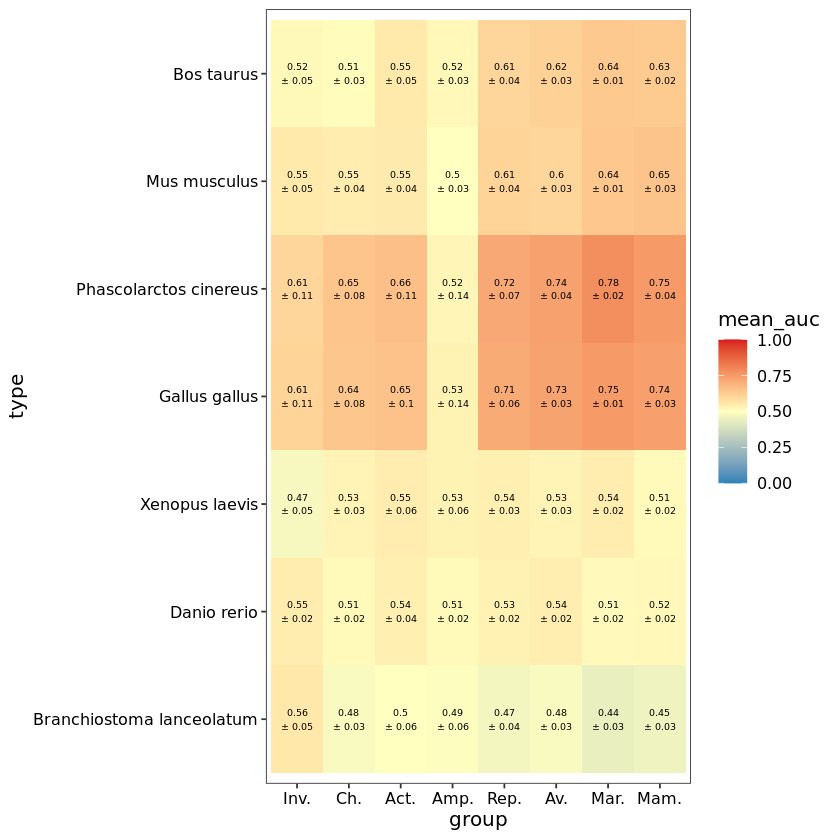

In [18]:
p <- ggplot(summary_auc_mean, aes(x = group, y = type, fill = mean_auc)) + 
geom_tile() +  
scale_fill_gradient2(limits = c(0,1), low = "#2b83ba",mid ="#ffffbf",  high ="#d7191c", midpoint = 0.5 ) + 
geom_text(aes(label = paste0(round(mean_auc,2), "\n± ", round(sd_auc,2))), size = 2)
p

In [19]:
ggsave("WGBS_RRBS_summary_heatmap.pdf", p, width = 6, height = 4)